In [145]:
import pandas as pd
import math as m
from matplotlib import pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

In [147]:
df=pd.read_csv('churn.csv')
print(df.shape)
df.head()


(3150, 14)


,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [149]:
df['Churn'].value_counts()

Churn
0    2655
1     495
Name: count, dtype: int64

<Axes: xlabel='Churn'>

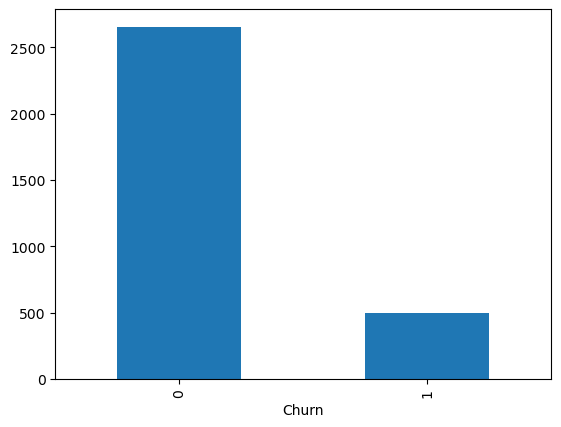

In [150]:
df['Churn'].value_counts().plot(kind='bar')

### Data Cleaning

In [154]:
df.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

### Scaling

In [156]:
scale=StandardScaler()
df[['Seconds of Use','Distinct Called Numbers','Customer Value','Age','Frequency of use','Frequency of SMS']]=scale.fit_transform(df[['Seconds of Use','Distinct Called Numbers','Customer Value','Age','Frequency of use','Frequency of SMS']])

In [158]:
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,-0.024411,0.026816,-0.607513,-0.378158,3,1,1,-0.113074,-0.528759,0
1,0,0,39,0,-0.989807,-1.122926,-0.589691,-1.133331,2,1,2,-0.679346,-0.822036,0
2,10,0,37,0,-0.481140,-0.164807,2.547012,0.028473,3,1,1,-0.113074,2.061285,0
3,10,0,38,0,-0.065390,-0.060285,-0.643157,0.667466,1,1,1,-1.811888,-0.446775,0
4,3,0,38,0,-0.495435,-0.199648,-0.634246,0.551285,1,1,1,-1.811888,-0.629033,0


In [160]:
df['Churn'].value_counts()

Churn
0    2655
1     495
Name: count, dtype: int64

In [161]:
### We can clearly see class Imbalance

### Training with logistic Regression

In [165]:
X=df.drop('Churn',axis=1)
y=df['Churn']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [167]:
log_model=LogisticRegression(max_iter=1000)
log_model.fit(X_train,y_train)
log_pred=log_model.predict(X_test)
log_report=classification_report(y_test,log_pred)
log_cm=confusion_matrix(y_test,log_pred)
print(log_report)
log_cm

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       783
           1       0.77      0.43      0.55       162

    accuracy                           0.88       945
   macro avg       0.83      0.70      0.74       945
weighted avg       0.87      0.88      0.86       945



array([[762,  21],
       [ 93,  69]], dtype=int64)

In [168]:
### Recall is too low , reason for thisn is class imbalance

### Training with Class imbalance trechniques

### Under Sampling MAjority class

In [172]:
from imblearn.under_sampling import RandomUnderSampler

In [173]:
rus=RandomUnderSampler(random_state=42)

In [174]:
### We dont have to touch our test dataset ,because we want test data to be completely new so we apply sampling on only train dataset

In [176]:
X_train_rus,y_train_rus=rus.fit_resample(X_train,y_train)

In [178]:
X_train_rus.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value
648,2,0,8,0,-0.047045,-0.617736,0.978661,-1.017150,3,1,1,-0.113074,0.838381
2757,20,0,39,3,1.224028,1.019775,0.773706,1.422638,3,1,1,-0.113074,1.080501
2070,2,0,35,0,1.593318,1.368182,-0.616424,1.248368,3,1,1,-0.113074,-0.005132
2019,0,0,35,0,0.650556,0.897833,2.707412,1.016007,2,1,1,-0.679346,3.008332
2129,6,0,38,1,-0.595500,-0.669997,-0.589691,-0.900970,4,1,1,1.585739,-0.780319


In [183]:
y_train_rus.value_counts()

Churn
0    333
1    333
Name: count, dtype: int64

<Axes: xlabel='Churn'>

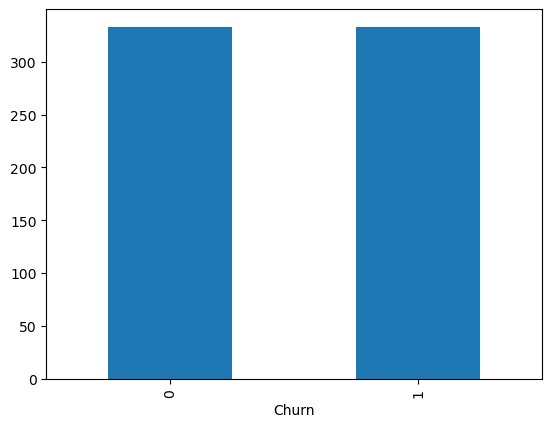

In [184]:
y_train_rus.value_counts().plot(kind='bar')

In [209]:
log_model=LogisticRegression(max_iter=1000)
log_model.fit(X_train_rus,y_train_rus)
log_pred_rus=log_model.predict(X_test)
log_report_rus=classification_report(y_test,log_pred_rus)
log_cm_rus=confusion_matrix(y_test,log_pred_rus)
print(log_report_rus)
log_cm_rus

              precision    recall  f1-score   support

           0       0.96      0.83      0.89       783
           1       0.50      0.85      0.63       162

    accuracy                           0.83       945
   macro avg       0.73      0.84      0.76       945
weighted avg       0.88      0.83      0.84       945



array([[646, 137],
       [ 25, 137]], dtype=int64)

In [211]:
### Recall increased but Precision Decreased 

###  2 SMOTE technique

In [214]:
from imblearn.over_sampling import SMOTE

In [216]:
smote=SMOTE(random_state=42)
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)
y_train_smote.value_counts()

Churn
0    1872
1    1872
Name: count, dtype: int64

<Axes: xlabel='Churn'>

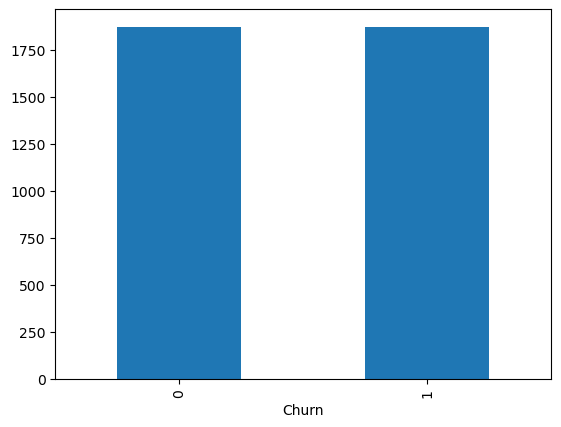

In [218]:
y_train_smote.value_counts().plot(kind='bar')

In [220]:
log_model=LogisticRegression(max_iter=1000)
log_model.fit(X_train_smote,y_train_smote)
log_pred_smote=log_model.predict(X_test)
log_report_smote=classification_report(y_test,log_pred_smote)
log_cm_smote=confusion_matrix(y_test,log_pred_smote)
print(log_report_smote)
log_cm_smote

              precision    recall  f1-score   support

           0       0.96      0.82      0.88       783
           1       0.49      0.83      0.62       162

    accuracy                           0.82       945
   macro avg       0.72      0.83      0.75       945
weighted avg       0.88      0.82      0.84       945



array([[642, 141],
       [ 27, 135]], dtype=int64)

### smotetomek

In [225]:
from imblearn.combine import SMOTETomek
smote_tomek=SMOTETomek()

In [227]:
X_train_smote_tomek,y_train_smote_tomek=smote_tomek.fit_resample(X_train,y_train)
y_train_smote_tomek.value_counts()

Churn
0    1865
1    1865
Name: count, dtype: int64

In [229]:
log_model=LogisticRegression(max_iter=1000)
log_model.fit(X_train_smote_tomek,y_train_smote_tomek)
log_pred_smote_tomek=log_model.predict(X_test)
log_report_smote_tomek=classification_report(y_test,log_pred_smote_tomek)
log_cm_smote_tomek=confusion_matrix(y_test,log_pred_smote_tomek)
print(log_report_smote_tomek)
log_cm_smote_tomek

              precision    recall  f1-score   support

           0       0.96      0.82      0.88       783
           1       0.49      0.84      0.62       162

    accuracy                           0.82       945
   macro avg       0.73      0.83      0.75       945
weighted avg       0.88      0.82      0.84       945



array([[641, 142],
       [ 26, 136]], dtype=int64)